In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [51]:
data = pd.read_csv("C:/Users/alish/OneDrive/Desktop/ML/ML Final project/pd_speech_features.csv")

In [52]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [53]:
data.head(10)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057,0.000069,0.00161,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


In [54]:
data.tail(10)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
746,248,1,0.83110,0.67512,0.42389,347,346,0.005557,0.001413,0.00313,...,3.5398,3.4060,2.5200,2.2957,2.6990,3.2788,3.0250,2.8945,2.7425,1
747,249,1,0.85141,0.78231,0.42890,343,342,0.005628,0.000034,0.00077,...,117.6949,97.7565,52.4362,14.2118,8.5630,13.5210,17.9862,19.3200,16.7182,1
748,249,1,0.79645,0.78772,0.36342,340,339,0.005686,0.000050,0.00084,...,81.7657,46.9118,8.7211,3.8029,3.5360,3.9038,3.5144,4.6629,3.2192,1
749,249,1,0.81171,0.79637,0.32824,336,335,0.005739,0.000041,0.00079,...,71.9877,52.2558,26.1383,8.8848,7.5768,18.2321,28.5223,18.9284,15.5225,1
750,250,0,0.83172,0.57849,0.36017,375,374,0.005147,0.000036,0.00088,...,2.9830,3.3785,3.1691,2.9234,2.5662,2.4621,2.7629,3.0735,5.1190,0
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0
755,251,0,0.81304,0.76471,0.46374,340,339,0.005676,0.000037,0.00078,...,62.9927,21.8152,9.2457,4.8555,3.0551,3.0415,4.0116,2.6217,3.1527,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [56]:
data.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [57]:
X = data.iloc[:, 0:754].values
y = data.iloc[:, 754].values

In [58]:
X

array([[  0.     ,   1.     ,   0.85247, ...,   2.6202 ,   3.0004 ,
         18.9405 ],
       [  0.     ,   1.     ,   0.76686, ...,   6.5245 ,   6.3431 ,
         45.178  ],
       [  0.     ,   1.     ,   0.85083, ...,   2.9199 ,   3.1495 ,
          4.7666 ],
       ...,
       [251.     ,   0.     ,   0.88389, ...,   3.5377 ,   3.3545 ,
          5.0424 ],
       [251.     ,   0.     ,   0.83782, ...,   2.6801 ,   2.8332 ,
          3.7131 ],
       [251.     ,   0.     ,   0.81304, ...,   4.0116 ,   2.6217 ,
          3.1527 ]])

In [59]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [60]:
data.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [61]:
X = data.iloc[:,:754]
y = data["class"]
scale = StandardScaler()
X = scale.fit_transform(X)
X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X) # another method
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0013245  -0.13378215  0.02670192 ... -0.05811108 -0.05788379
  -0.05584903]
 [-0.13378215  1.0013245   0.01018855 ...  0.12910653  0.10787687
   0.10496656]
 [ 0.02670192  0.01018855  1.0013245  ...  0.04623629  0.03743406
   0.03964023]
 ...
 [-0.05811108  0.12910653  0.04623629 ...  1.0013245   0.94926382
   0.7861811 ]
 [-0.05788379  0.10787687  0.03743406 ...  0.94926382  1.0013245
   0.86784425]
 [-0.05584903  0.10496656  0.03964023 ...  0.7861811   0.86784425
   1.0013245 ]]


In [62]:
print('NumPy covariance matrix: \n%s' %np.cov(X.T))

NumPy covariance matrix: 
[[ 1.0013245  -0.13378215  0.02670192 ... -0.05811108 -0.05788379
  -0.05584903]
 [-0.13378215  1.0013245   0.01018855 ...  0.12910653  0.10787687
   0.10496656]
 [ 0.02670192  0.01018855  1.0013245  ...  0.04623629  0.03743406
   0.03964023]
 ...
 [-0.05811108  0.12910653  0.04623629 ...  1.0013245   0.94926382
   0.7861811 ]
 [-0.05788379  0.10787687  0.03743406 ...  0.94926382  1.0013245
   0.86784425]
 [-0.05584903  0.10496656  0.03964023 ...  0.7861811   0.86784425
   1.0013245 ]]


In [63]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eigenvectors[:5])
print('\nEigenvalues \n%s' %eigenvalues[:5])

Eigenvectors 
[[-7.34343947e-03 -1.16719053e-03  6.51538260e-03 ... -3.43290038e-08
  -3.71459420e-08 -2.74798023e-09]
 [ 4.50265736e-02 -4.70096509e-02 -6.29257413e-03 ...  1.16818609e-06
  -5.61678821e-07  7.09210485e-07]
 [-1.73695965e-02 -1.04538133e-02 -5.76635105e-02 ...  1.25046510e-06
   1.39656748e-07  1.37776328e-07]
 [ 4.92192614e-02 -2.46931648e-03  1.58072835e-03 ...  1.29662134e-06
   5.81470706e-07  7.87812278e-09]
 [ 5.49956743e-02 -4.58086092e-03  4.95065904e-02 ...  1.11788932e-06
  -1.55929552e-07  3.11682662e-07]]

Eigenvalues 
[97.73833579 70.80079574 62.22641008 32.3546798  26.90448685]


In [64]:
#Compute the variance of eigen values
total_of_eigenvalues = sum(eigenvalues)
#This sorts the eigenvalues in descending order.
#Eigenvalues with larger magnitudes correspond to dimensions that capture more variance in the data.
varariance = [(i / total_of_eigenvalues)*100 for i in
sorted(eigenvalues, reverse=True)]
varariance[:50]

[12.945497649128216,
 9.377605291277424,
 8.241923079119964,
 4.285395570467561,
 3.563514443250969,
 2.9924211171447292,
 2.508247991385923,
 2.2118022409786517,
 2.032794523507785,
 1.8219685053528056,
 1.7648876189227602,
 1.4932749143002972,
 1.3051535894300603,
 1.2712427480397706,
 1.267500146799638,
 1.1662274492028097,
 1.0677508285842237,
 1.0569704086230738,
 0.9484213759821534,
 0.9343986018183793,
 0.8664490917172956,
 0.8054486120155161,
 0.7619017160440676,
 0.7386731197986585,
 0.667549082910032,
 0.6269640033489294,
 0.6230528890774699,
 0.6081042667178632,
 0.5863152359934479,
 0.5587794280264614,
 0.5263561269283488,
 0.5219340238524488,
 0.4984897127981551,
 0.48155301409573753,
 0.4692146311775066,
 0.4573716060782623,
 0.4411159750124863,
 0.41540451473797685,
 0.4029501972739869,
 0.3806075514009989,
 0.3772762864733819,
 0.36879195041102525,
 0.36037333481328154,
 0.35038884399648024,
 0.34600638834247205,
 0.3415038289791362,
 0.3356753388836706,
 0.314942596552

In [67]:
with plt.style.context('dark_background'):
 plt.figure(figsize=(15, 10))
 plt.bar(range(len(eigenvalues)), varariance, alpha=0.8,
align='center',
 label='individual explained variance')
 plt.ylabel('Explained variance ratio')
 plt.xlabel('Principal components')
 plt.legend(loc='best')
 plt.tight_layout()

In [68]:
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
num_components_to_retain = np.argmax(cumulative_variance_ratio >= 0.8)
+ 1
print("Number of components to retain:", num_components_to_retain)

Number of components to retain: 60


In [69]:
projection_matrix = sorted_eigenvectors[:, :num_components_to_retain]
X = np.dot(X, projection_matrix)
print("Transformed data shape:", X.shape)

Transformed data shape: (756, 60)


In [70]:
varariance[0]

12.945497649128216

In [71]:
#Projection Matrix
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sorting eigenvalues and eigenvectors from higher values to lower values
eigenpairs.sort(key=lambda x: x[0], reverse=True)

eigenpairs[0][0]

97.73833578737315

In [72]:
eigenpairs[5][1].shape

(754,)

In [73]:
import numpy as np

# Assuming eigenpairs is a list of eigenpairs
# Extract the required eigenpairs (adjust the indices according to your data)

selected_eigenpairs = [eigenpairs[i][1].reshape(754, 1) for i in range(6)]

# Concatenate the selected eigenpairs horizontally
matrix_weighing = np.column_stack(selected_eigenpairs)
matrix_weighing

array([[-0.00734344, -0.00116719,  0.00651538, -0.01492142, -0.02300192,
        -0.02108613],
       [ 0.04502657, -0.04700965, -0.00629257,  0.02420969,  0.01025892,
        -0.0093586 ],
       [-0.0173696 , -0.01045381, -0.05766351,  0.01222901, -0.0054791 ,
        -0.02363094],
       ...,
       [ 0.01324704,  0.00858509, -0.0217637 ,  0.01327137,  0.03581234,
         0.023377  ],
       [ 0.01942424,  0.01718094, -0.02271759,  0.01791082,  0.02336868,
         0.02014452],
       [ 0.02902069,  0.03571027, -0.02900893,  0.02433487,  0.01406922,
         0.01866721]])

In [74]:
data["class"].unique()

array([1, 0], dtype=int64)

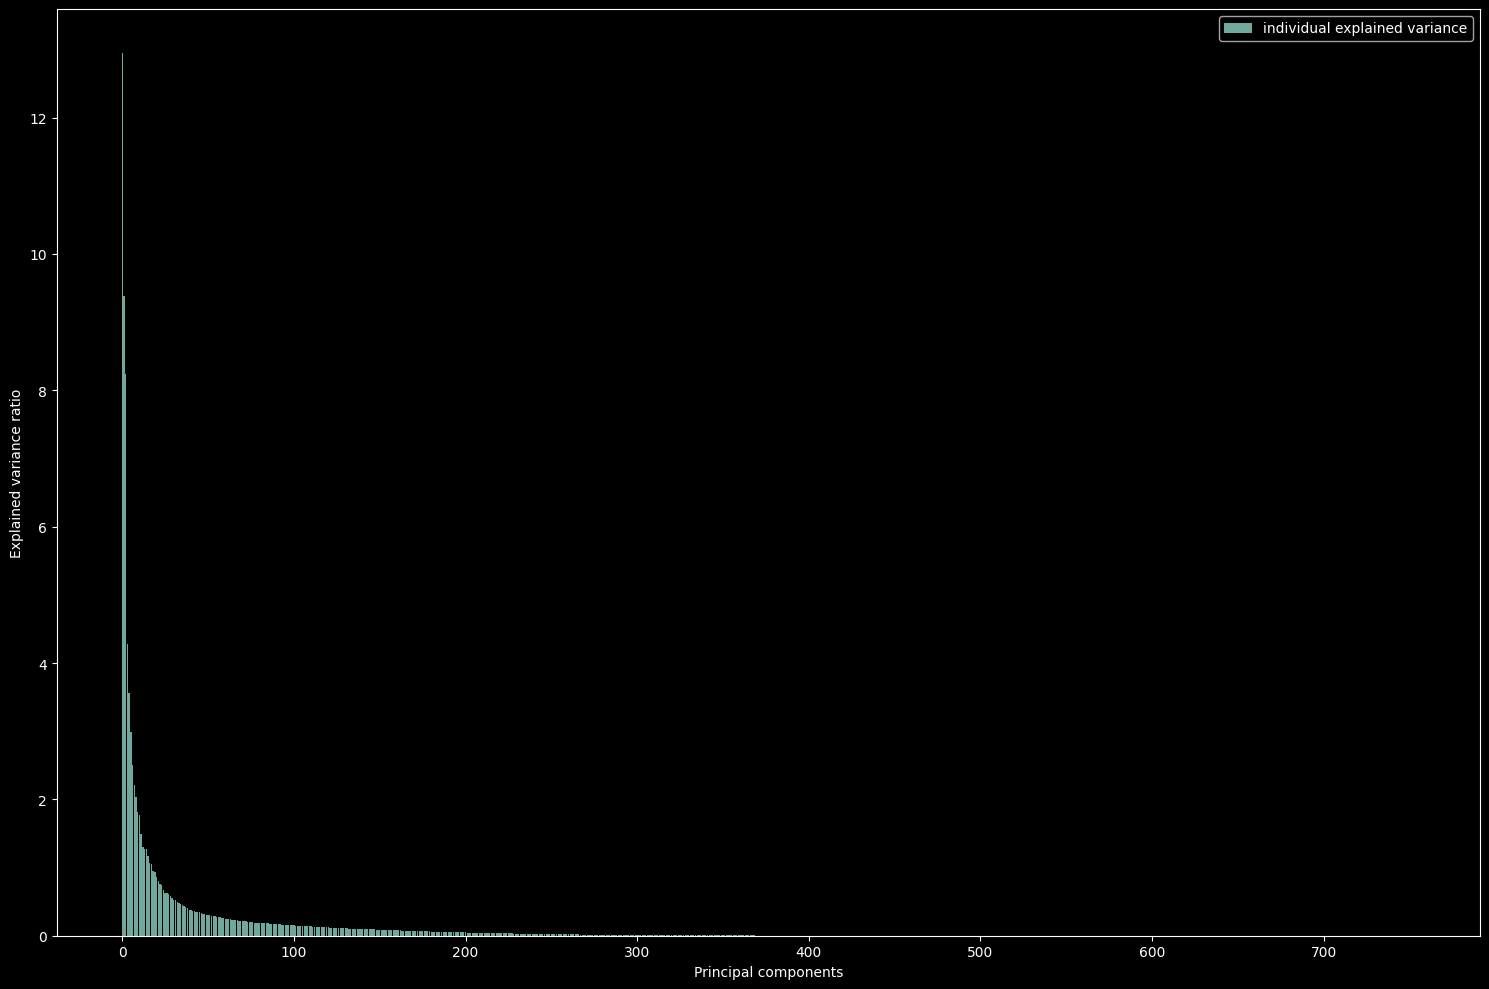

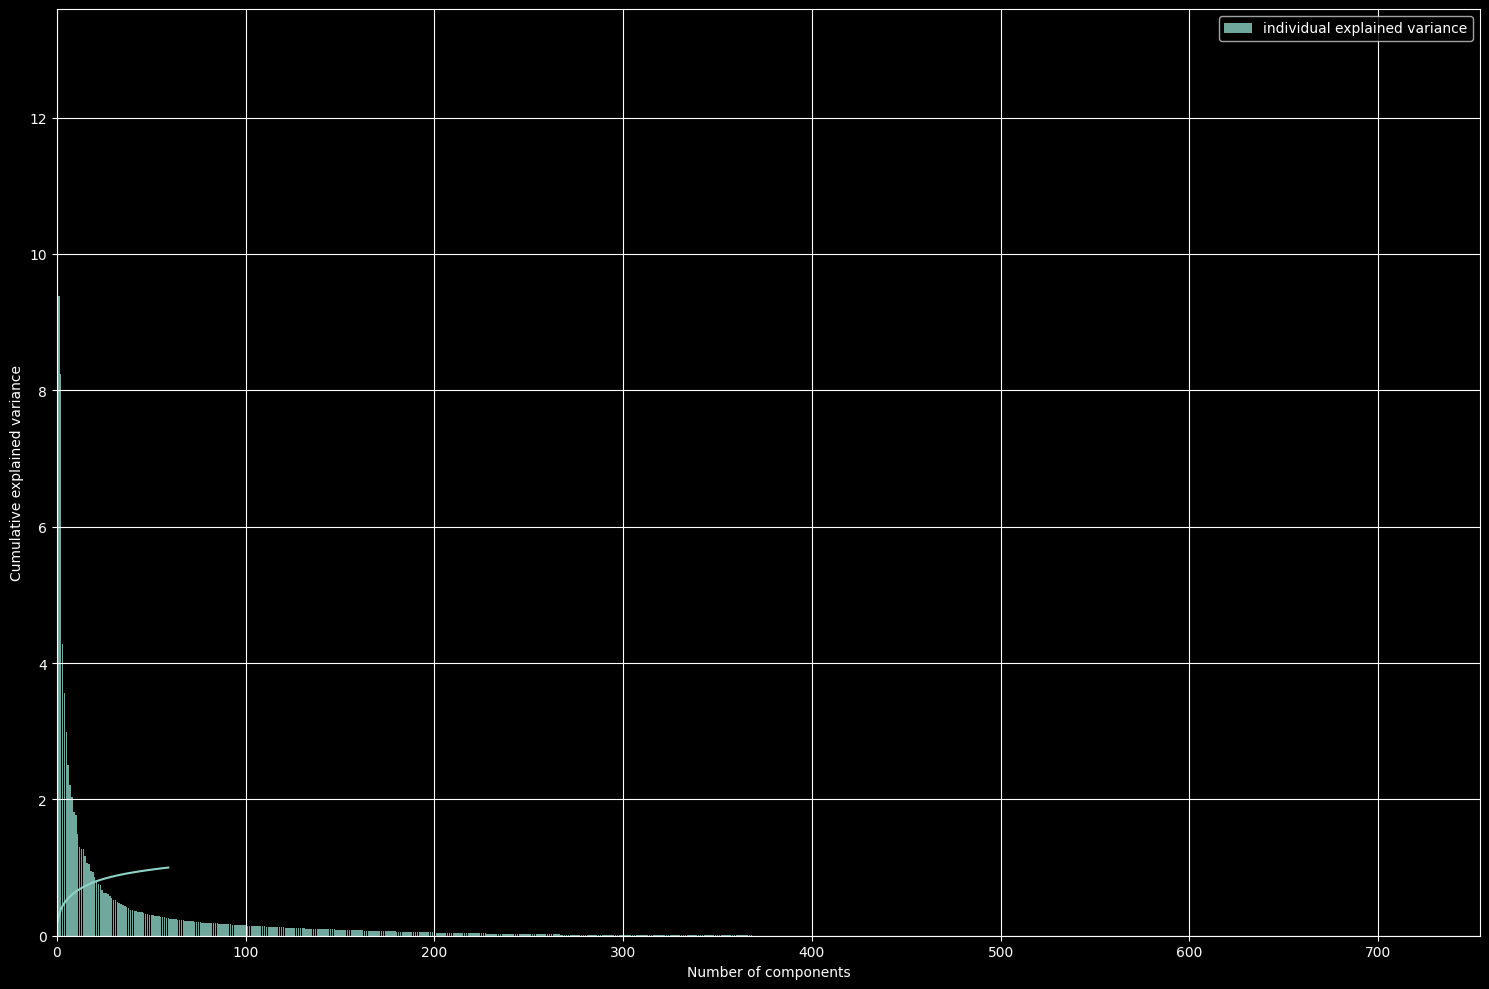

In [75]:
#Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,754,1)
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)

X_train shape =  (604, 60)
X_test shape =  (152, 60)


In [78]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)

X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)

print("X_train2 shape = ",X_train2.shape)
print("X_test2 shape = ",X_test2.shape)

X_train2 shape =  (604, 6)
X_test2 shape =  (152, 6)


Log Training Accuracy: 0.8824503311258278
Log Testing Accuracy: 0.8223684210526315
              precision    recall  f1-score   support

           0       0.69      0.53      0.60        38
           1       0.85      0.92      0.89       114

    accuracy                           0.82       152
   macro avg       0.77      0.72      0.74       152
weighted avg       0.81      0.82      0.81       152



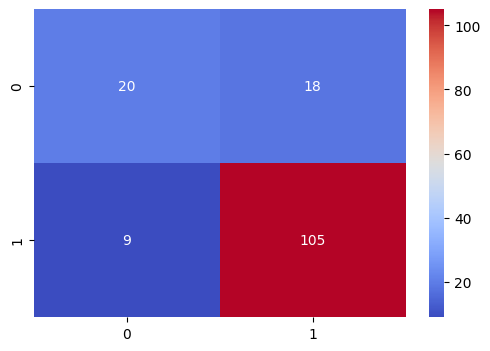

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Log = LogisticRegression()
Log.fit(X_train, y_train)
LogTrain = Log.score(X_train, y_train)
pred = Log.predict(X_test)
LogScore = accuracy_score(y_test, pred)
print("Log Training Accuracy:", LogTrain)
print("Log Testing Accuracy:", LogScore)
print(classification_report(y_test, pred))
confusionmatrix = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusionmatrix, annot=True, fmt="d", cmap="coolwarm")
plt.show()

Random Forest Training Accuracy: 0.9983443708609272
Random Forest Testing Accuracy: 0.8289473684210527
              precision    recall  f1-score   support

           0       0.80      0.42      0.55        38
           1       0.83      0.96      0.89       114

    accuracy                           0.83       152
   macro avg       0.82      0.69      0.72       152
weighted avg       0.83      0.83      0.81       152



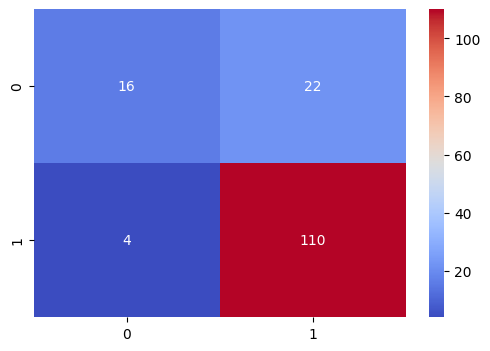

In [80]:
RFC = RandomForestClassifier(n_estimators=25)
RFC.fit(X_train, y_train)
RFCTrain = RFC.score(X_train, y_train)
pred = RFC.predict(X_test)
RFCScore = accuracy_score(y_test, pred)
print("Random Forest Training Accuracy:", RFCTrain)
print("Random Forest Testing Accuracy:", RFCScore)
print(classification_report(y_test, pred))
confusionmatrix = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusionmatrix, annot=True, fmt="d", cmap="coolwarm")
plt.show()

SVM Training Accuracy: 0.7880794701986755
SVM Testing Accuracy: 0.6907894736842105
              precision    recall  f1-score   support

           0       0.36      0.32      0.34        38
           1       0.78      0.82      0.80       114

    accuracy                           0.69       152
   macro avg       0.57      0.57      0.57       152
weighted avg       0.68      0.69      0.68       152



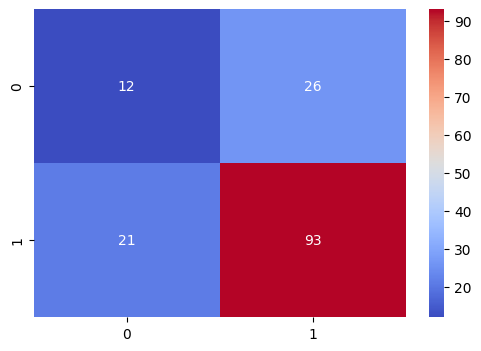

In [81]:
SVC = NuSVC(kernel='linear', nu=0.2, gamma='scale')
SVC.fit(X_train, y_train)
SVCTrain = SVC.score(X_train, y_train)
pred = SVC.predict(X_test)
SVCScore = accuracy_score(y_test, pred)
print("SVM Training Accuracy:", SVCTrain)
print("SVM Testing Accuracy:", SVCScore)
print(classification_report(y_test, pred))
confusionmatrix = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusionmatrix, annot=True, fmt="d", cmap="coolwarm")
plt.show()

Decision Training Accuracy: 0.9139072847682119
Decision Testing Accuracy: 0.8421052631578947
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        38
           1       0.88      0.91      0.90       114

    accuracy                           0.84       152
   macro avg       0.79      0.77      0.78       152
weighted avg       0.84      0.84      0.84       152



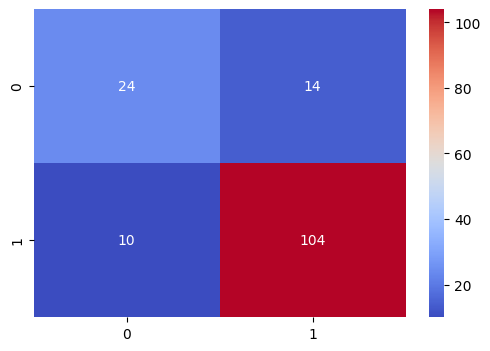

In [82]:
DTC = DecisionTreeClassifier(criterion = "entropy", max_depth=5)
DTC.fit(X_train, y_train)
DTCTrain = DTC.score(X_train, y_train)
pred = DTC.predict(X_test)
DTCScore = accuracy_score(y_test, pred)
print("Decision Training Accuracy:", DTCTrain)
print("Decision Testing Accuracy:", DTCScore)
print(classification_report(y_test, pred))
confusionmatrix = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusionmatrix, annot=True, fmt="d", cmap="coolwarm")
plt.show()

In [83]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/alish/OneDrive/Desktop/ML/ML Final project/pd_speech_features.csv")

# Display column names
print(data.columns)

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)


Model: Logistic Regression (PCA-transformed Data)
Accuracy: 0.8092105263157895

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        76
           1       0.82      0.79      0.81        76

    accuracy                           0.81       152
   macro avg       0.81      0.81      0.81       152
weighted avg       0.81      0.81      0.81       152




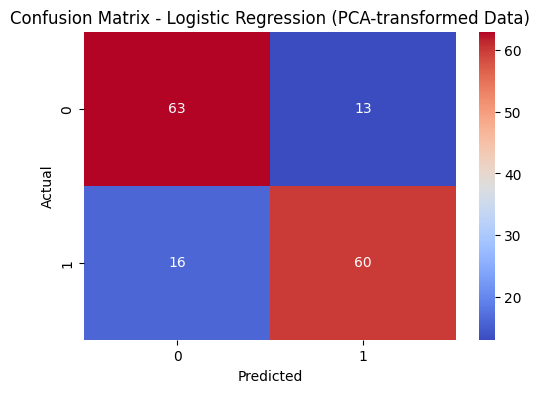

Model: Random Forest Classifier (PCA-transformed Data)
Accuracy: 0.8486842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        76
           1       0.84      0.87      0.85        76

    accuracy                           0.85       152
   macro avg       0.85      0.85      0.85       152
weighted avg       0.85      0.85      0.85       152




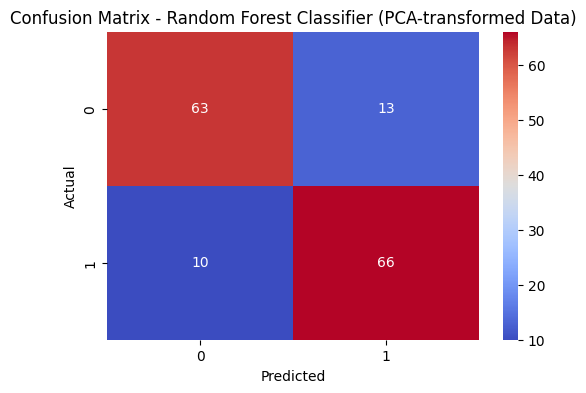

Model: SVM (PCA-transformed Data)
Accuracy: 0.8552631578947368

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        76
           1       0.85      0.87      0.86        76

    accuracy                           0.86       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.86      0.86      0.86       152




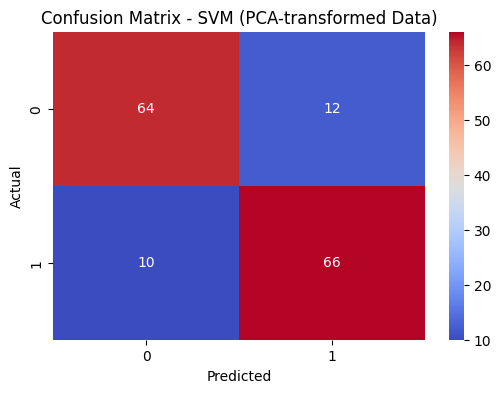

Model: Decision Tree Classifier (PCA-transformed Data)
Accuracy: 0.8157894736842105

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        76
           1       0.81      0.83      0.82        76

    accuracy                           0.82       152
   macro avg       0.82      0.82      0.82       152
weighted avg       0.82      0.82      0.82       152




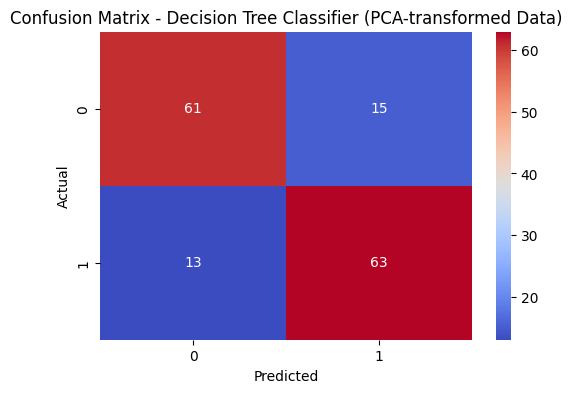

In [84]:
from sklearn.svm import SVC 

# Load the dataset
data = pd.read_csv("C:/Users/alish/OneDrive/Desktop/ML/ML Final project/pd_speech_features.csv")

# Separate features and target variable
X = data.drop(columns=['gender'])
y = data['gender']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=10)  # Set the number of components for PCA
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Train models on both original and PCA-transformed data
models = {
    'Logistic Regression (PCA-transformed Data)': LogisticRegression(),
    'Random Forest Classifier (PCA-transformed Data)': RandomForestClassifier(),
    'SVM (PCA-transformed Data)': SVC(kernel='rbf'),
    'Decision Tree Classifier (PCA-transformed Data)': DecisionTreeClassifier()
}

results = {}
for model_name, model in models.items():
    if 'PCA' in model_name:
        # Train a new model on PCA-transformed data
        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_pca)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        # Store results
        results[model_name] = {
            'Accuracy': accuracy,
            'Confusion Matrix': confusion,
            'Classification Report': classification_rep
        }

        # Display results
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy}\n")
        print(f"Classification Report:\n{classification_rep}\n")

        # Plotting the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion, annot=True, fmt="d", cmap="coolwarm")
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
